In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('../data/cleaned/all_fuel_prices.csv')

#checking data
df.head()

,Date,Price,Fuel Type
0,1986-02-15,15.46,Crude Oil
1,1986-03-15,12.61,Crude Oil
2,1986-04-15,12.84,Crude Oil
3,1986-05-15,15.38,Crude Oil
4,1986-06-15,13.43,Crude Oil


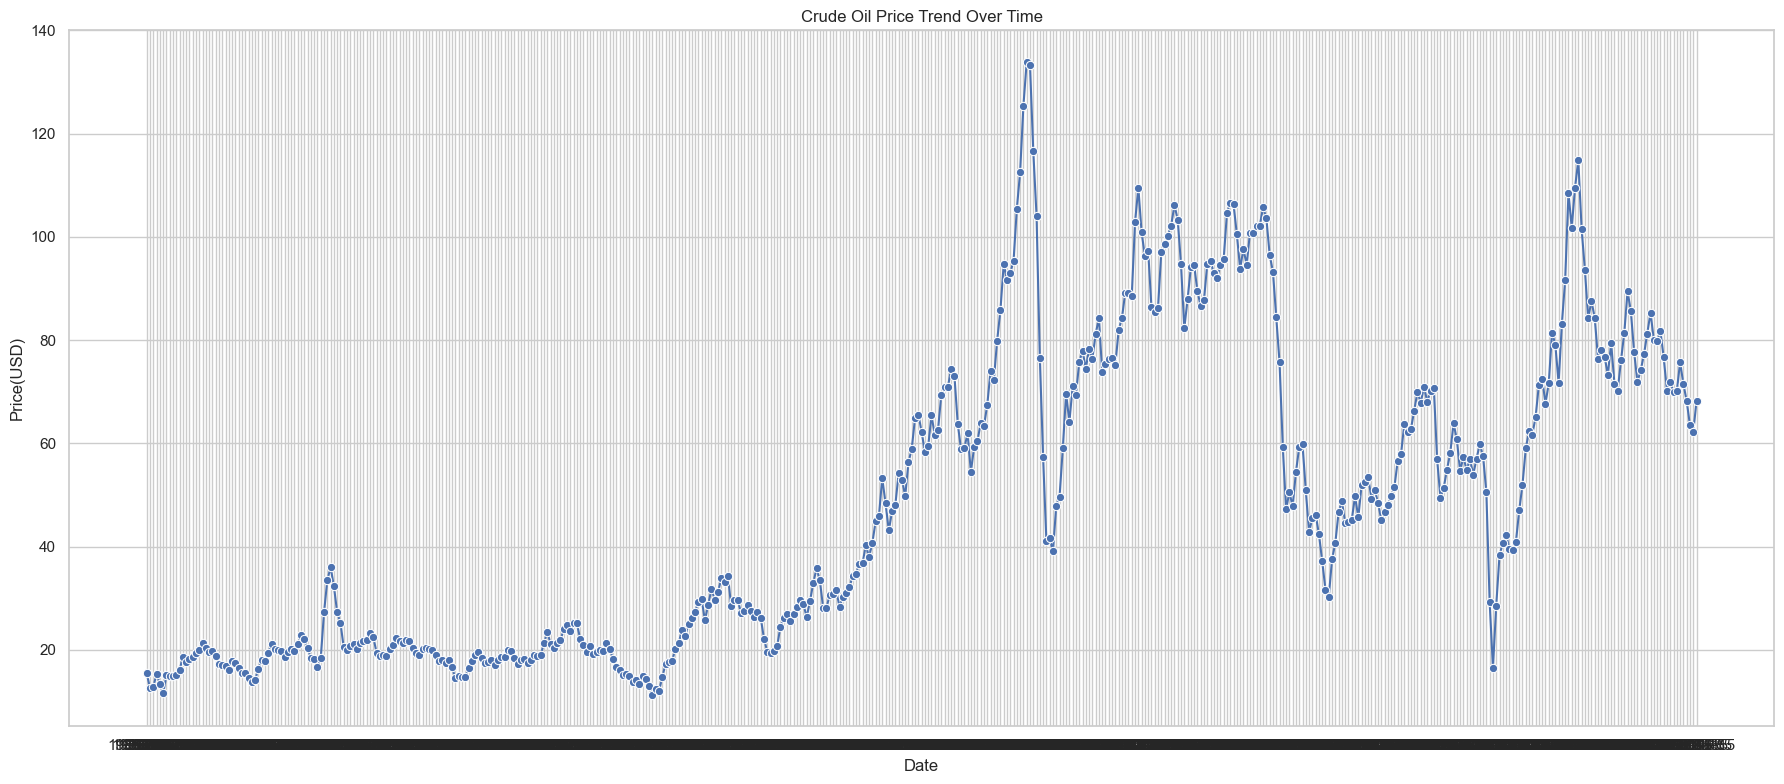

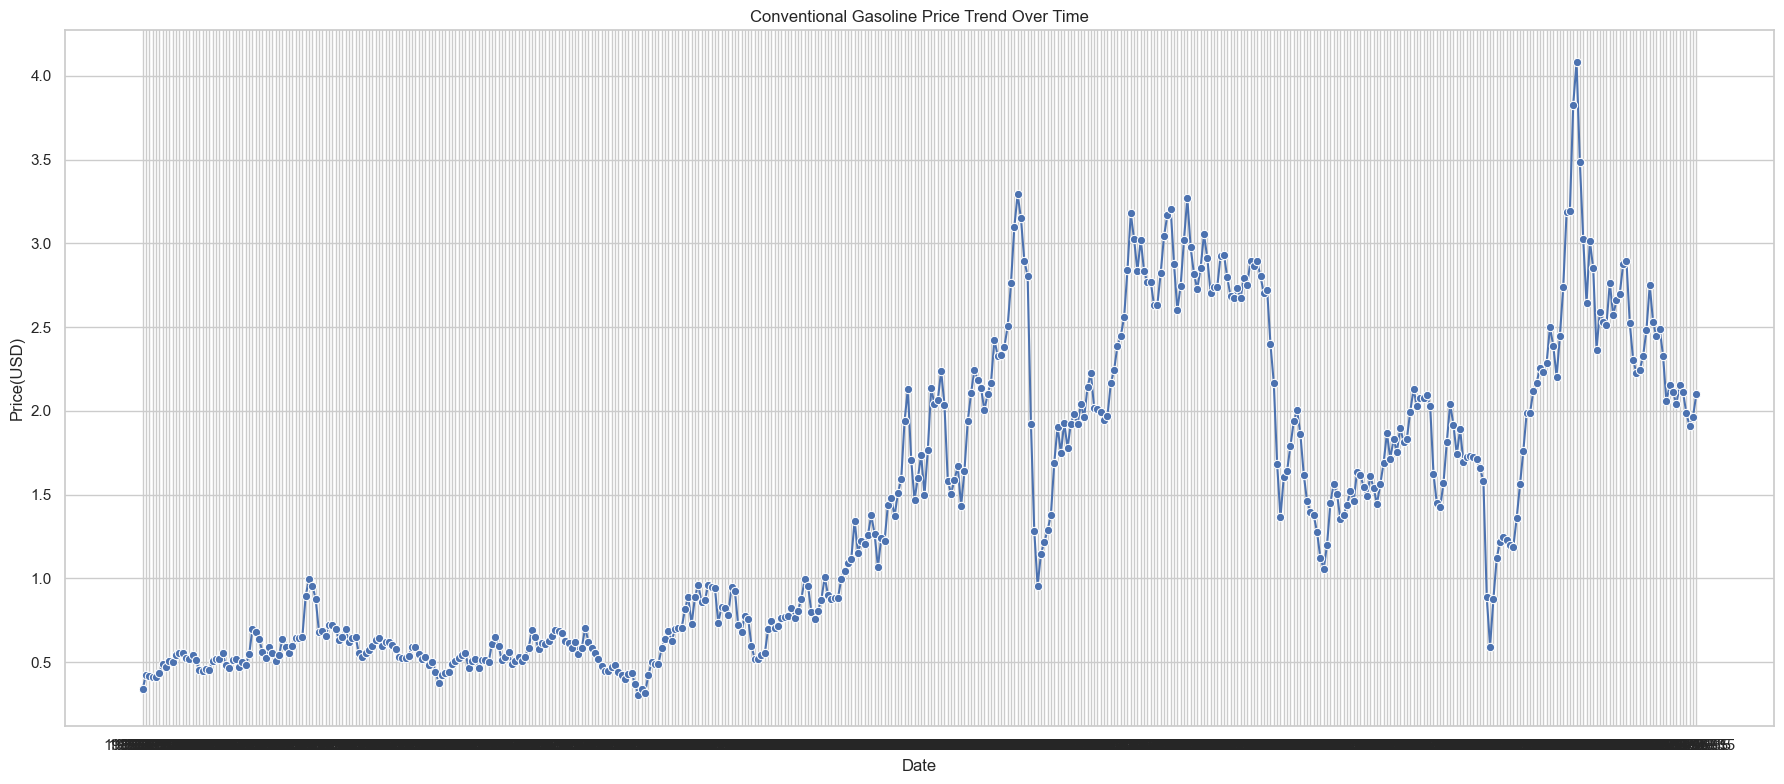

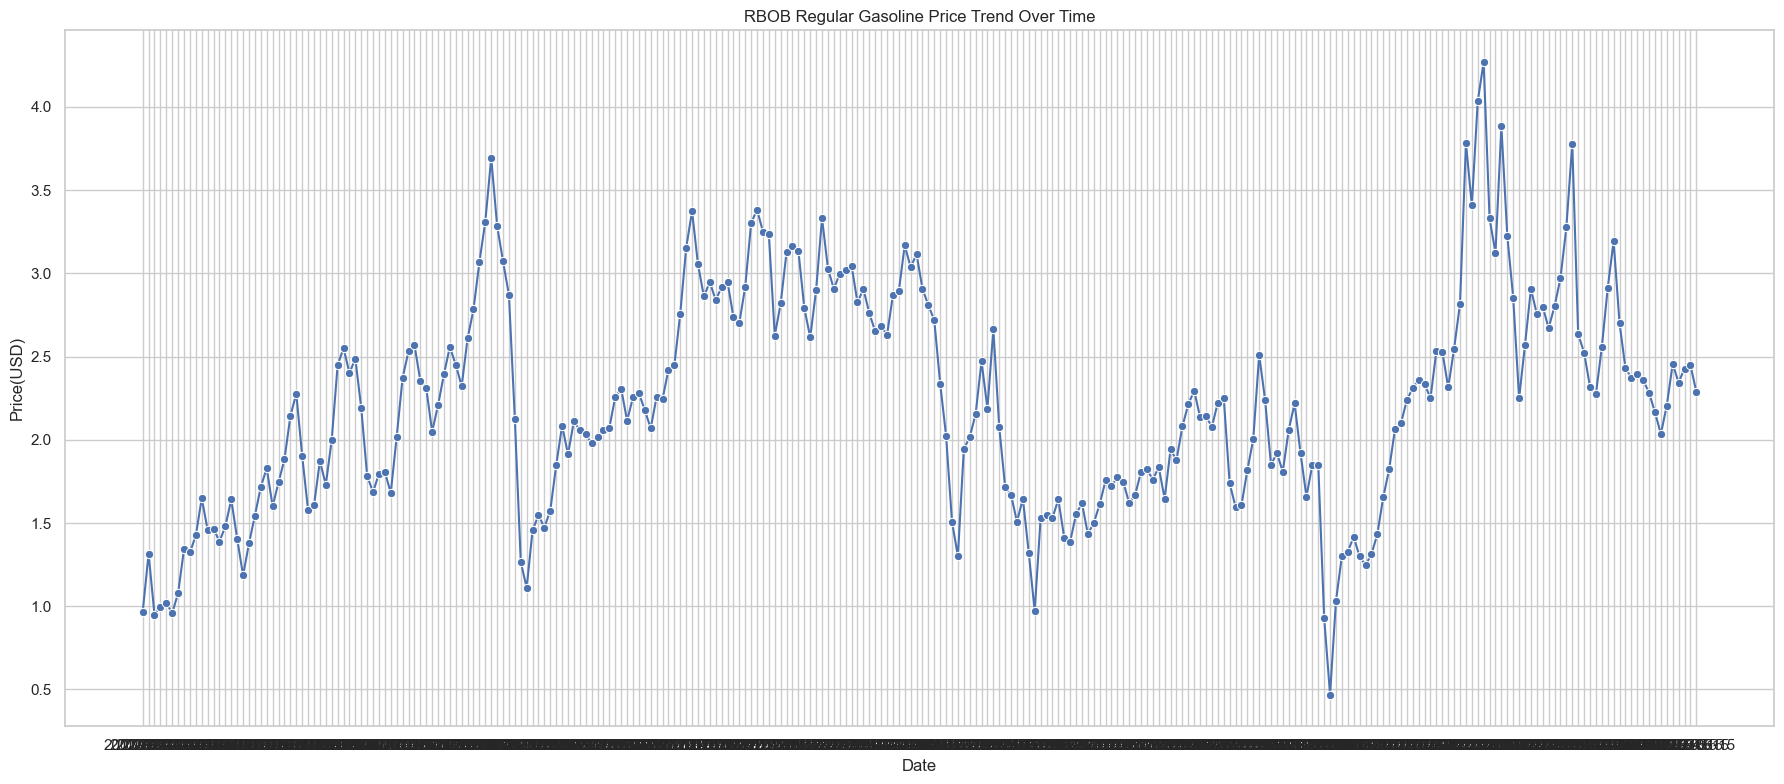

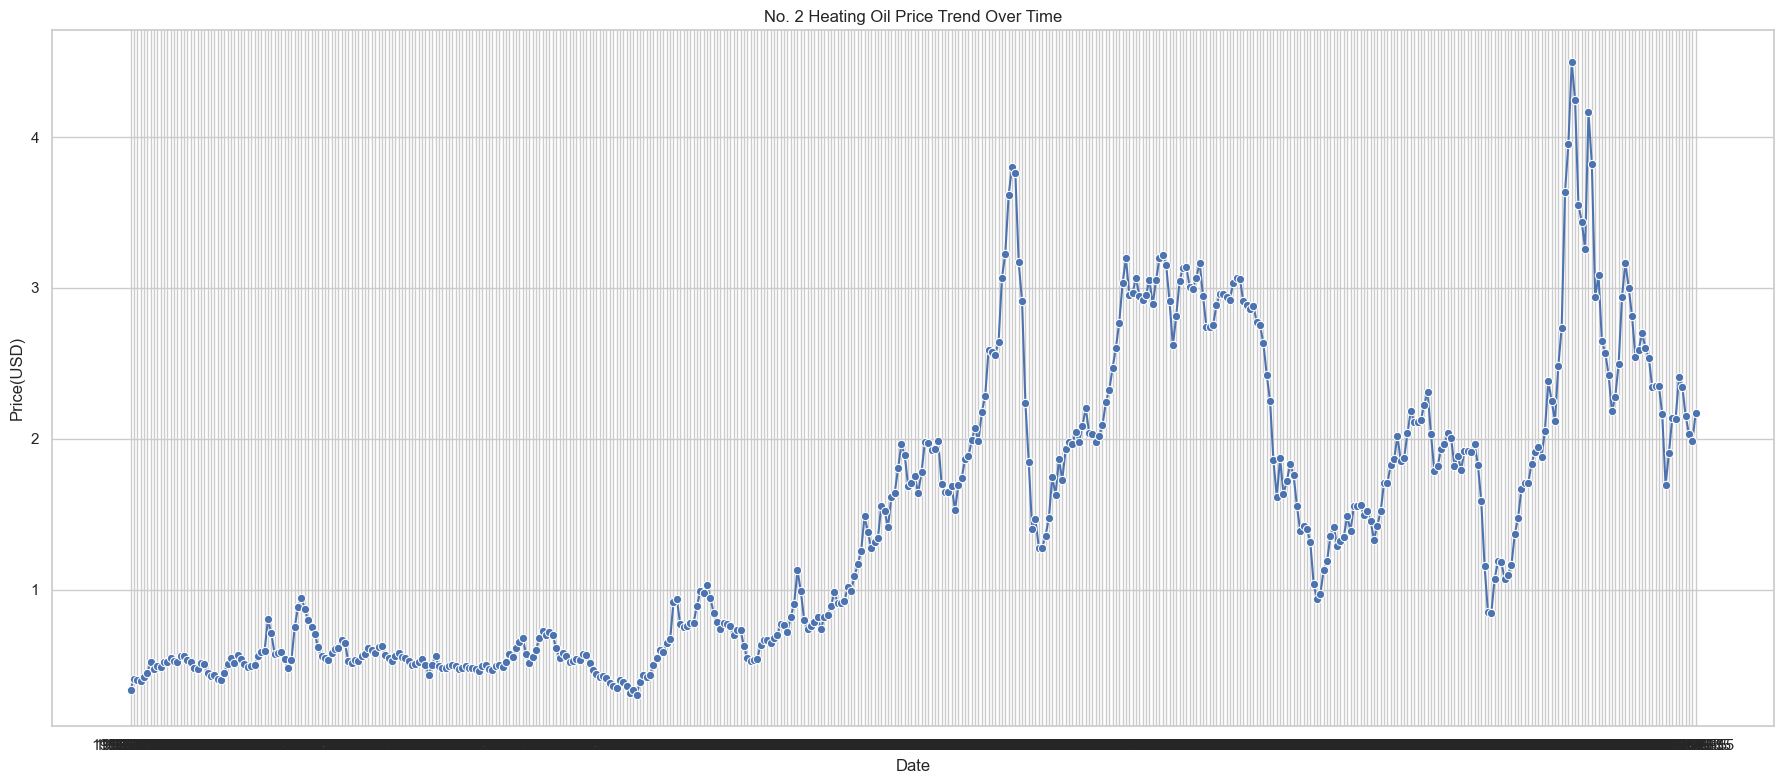

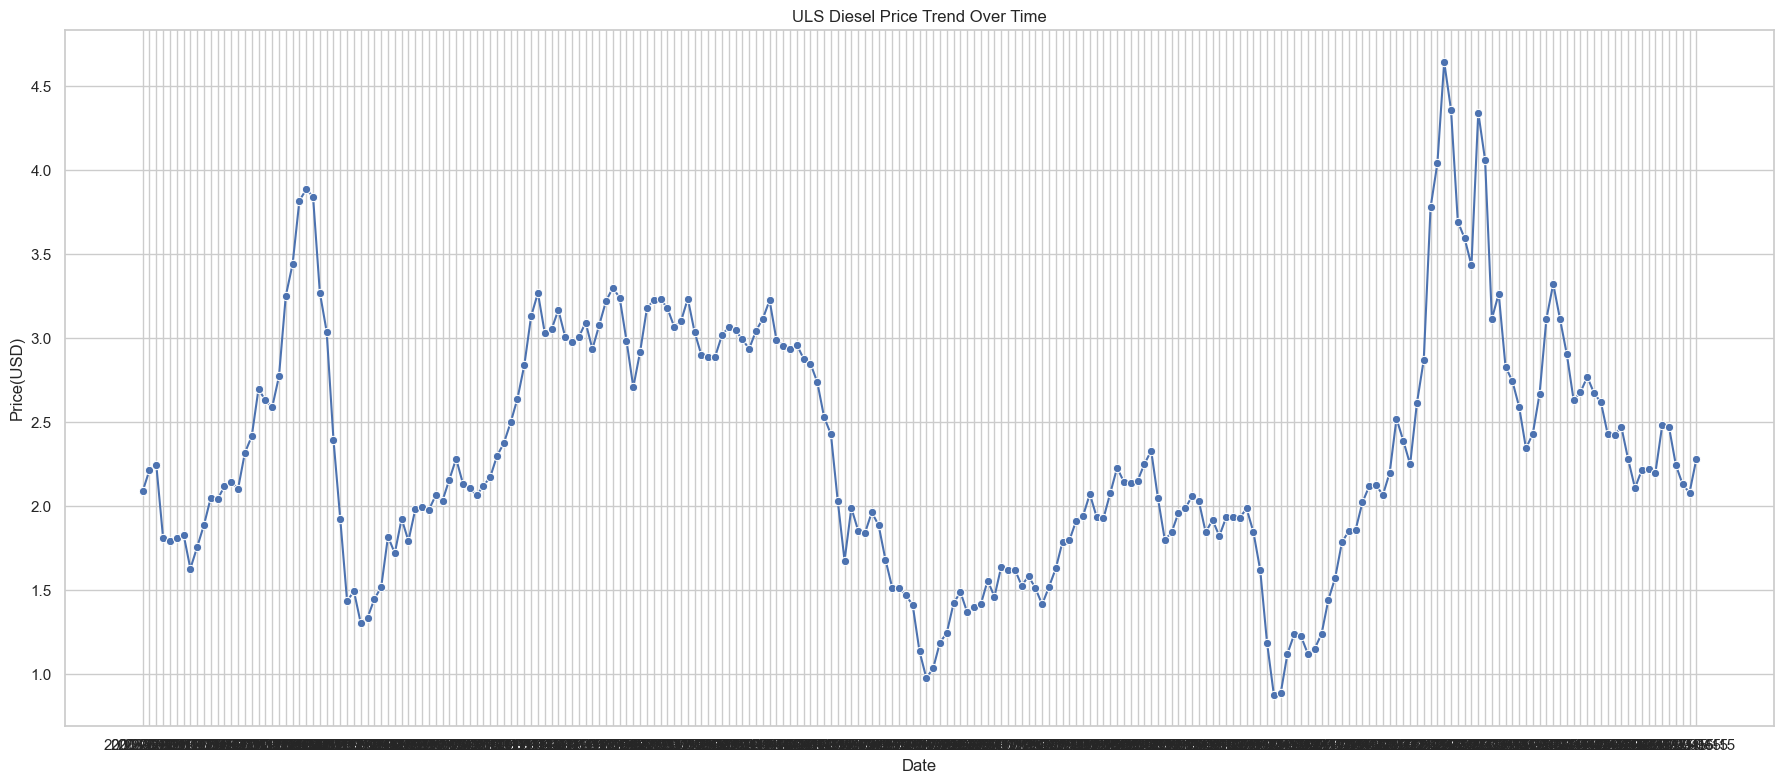

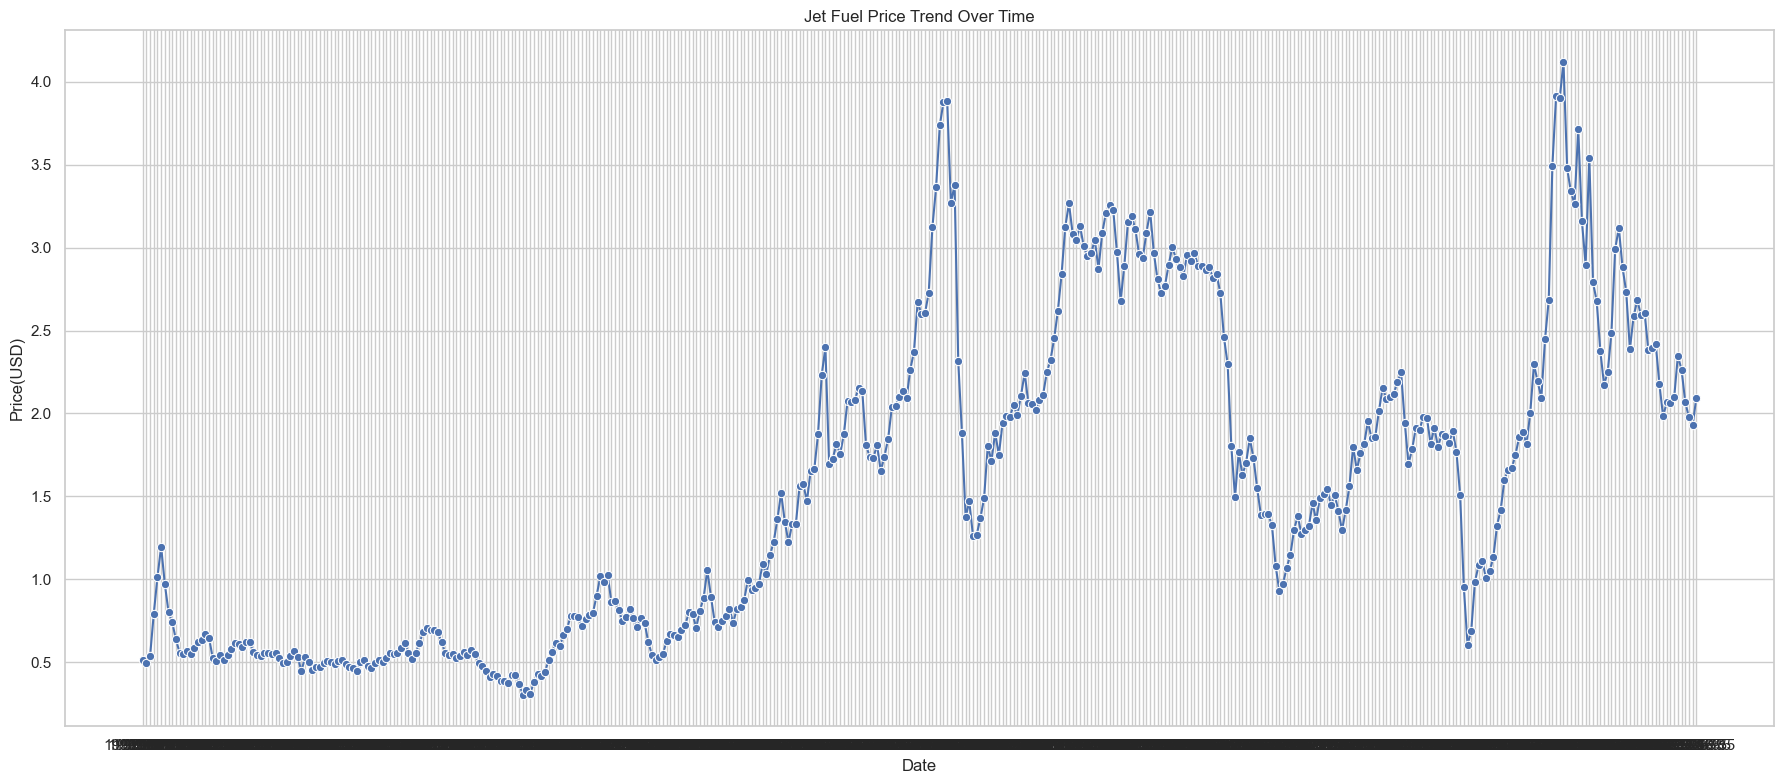

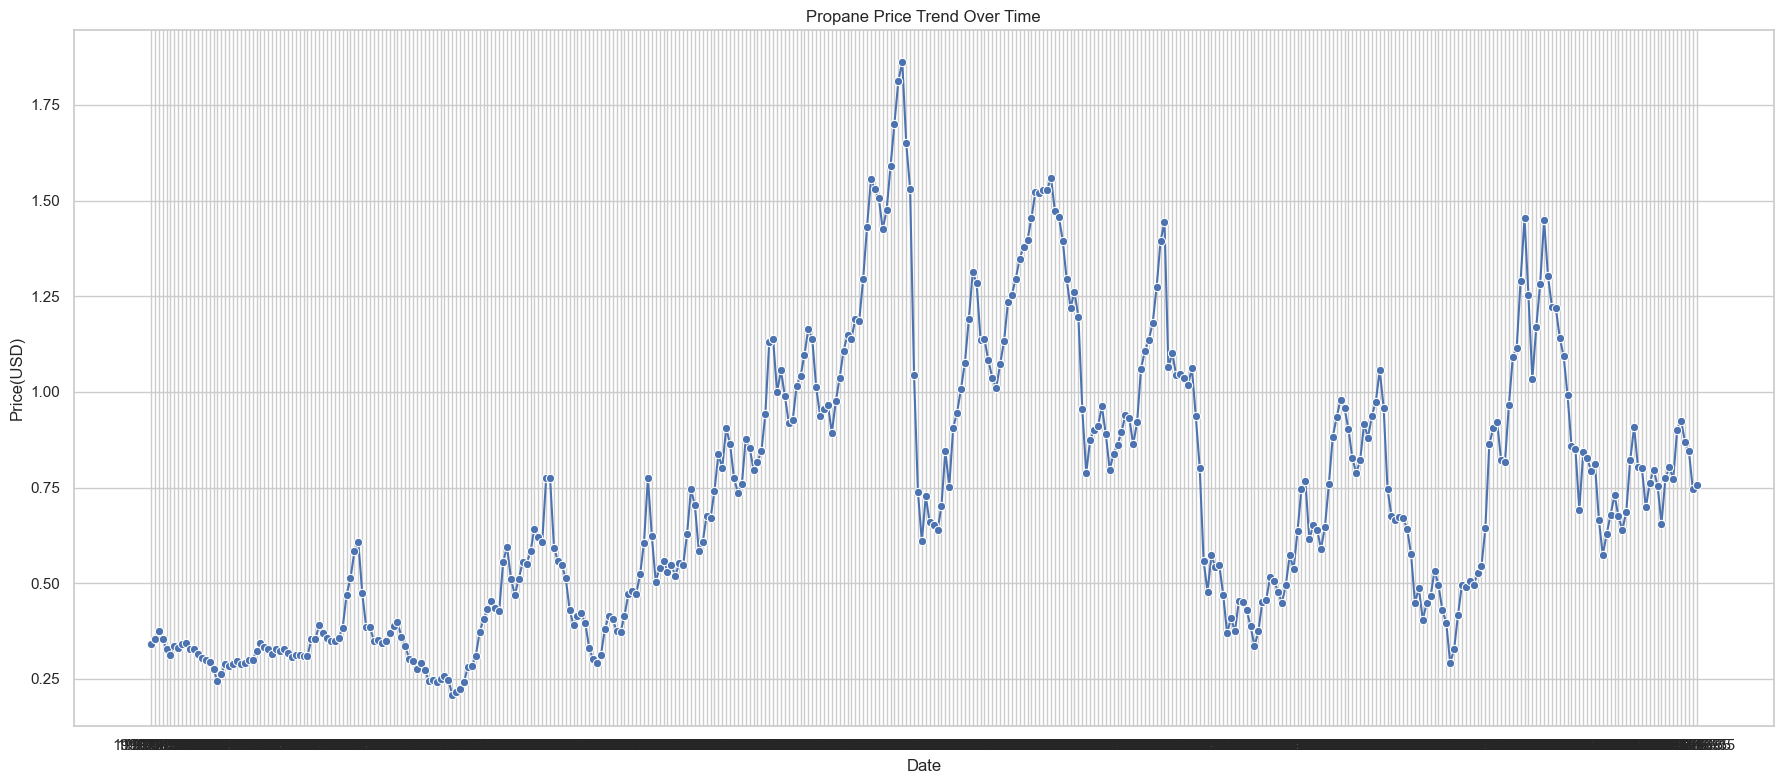

In [3]:
#set styling
sns.set(style='whitegrid')
fuel_types = df['Fuel Type'].unique()

#create one plot per fuel type
for fuel in fuel_types:
    plt.figure(figsize=(18, 8))
    sns.lineplot(data=df[df['Fuel Type'] == fuel], x='Date', y='Price', marker='o')
    plt.title(f'{fuel} Price Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price(USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()




In [4]:

#save each plot as an image
for fuel in fuel_types:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df[df['Fuel Type'] == fuel], x='Date', y='Price', marker='o')
    plt.title(f'{fuel} Price Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'../figures/{fuel.lower().replace(" ", "_")}_trend.png')
    plt.close()

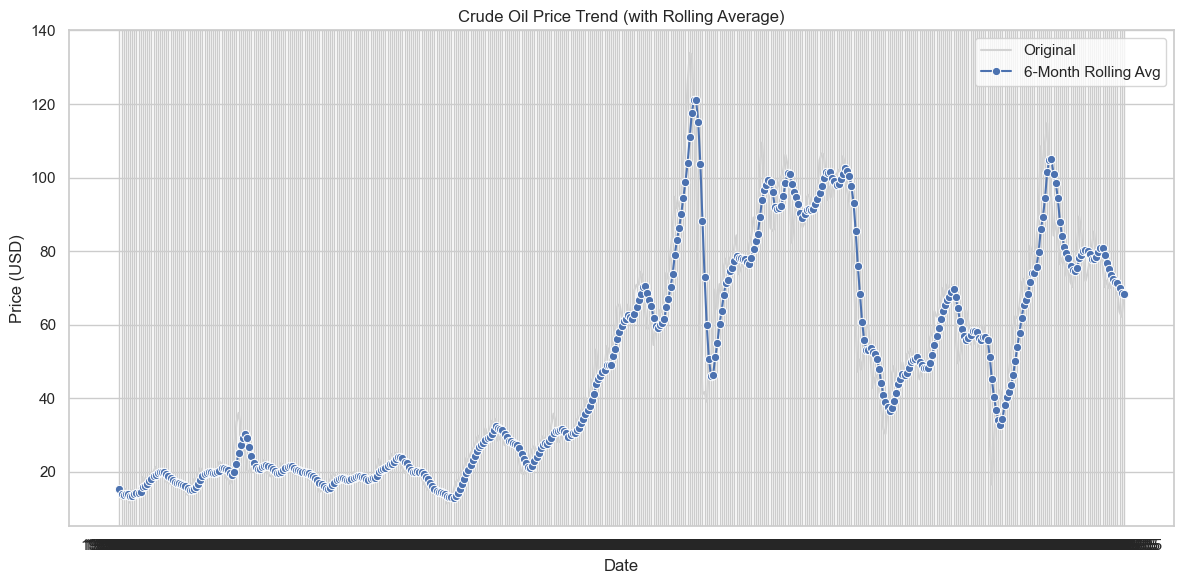

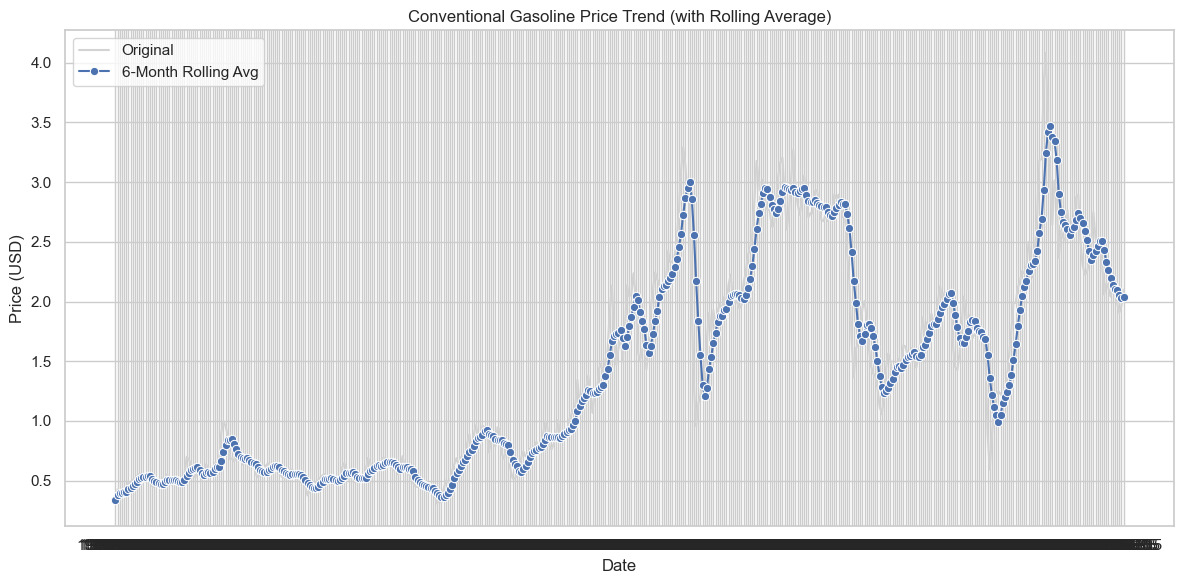

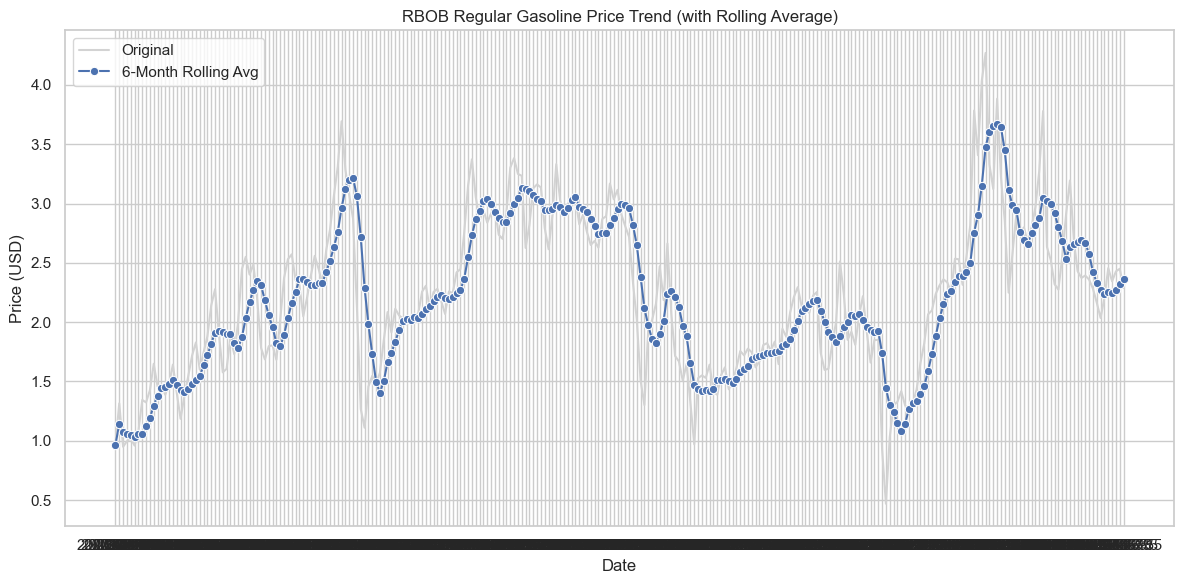

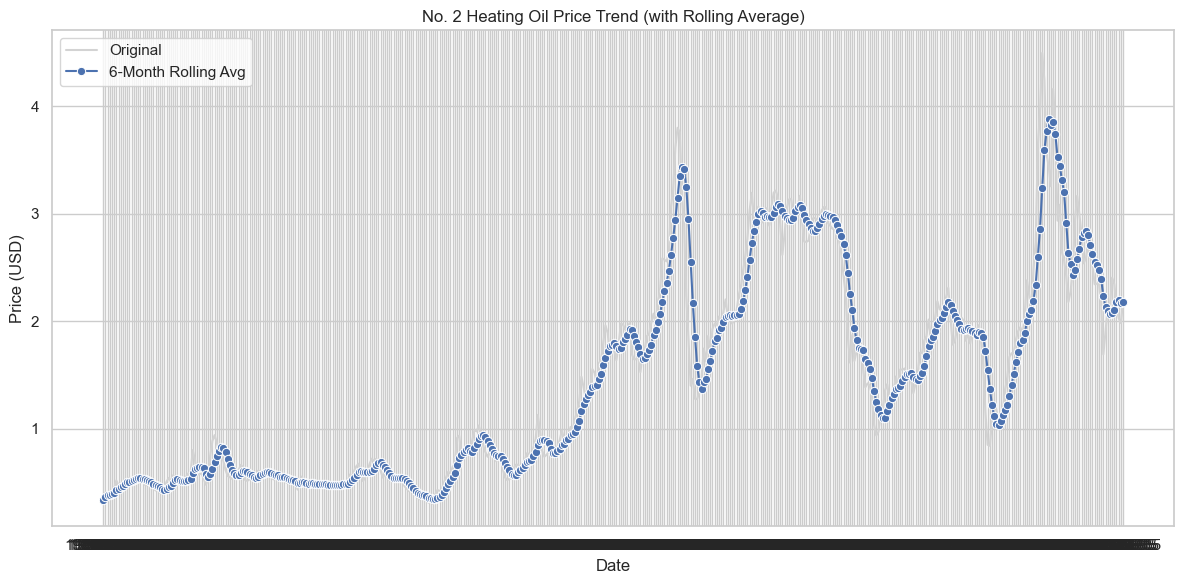

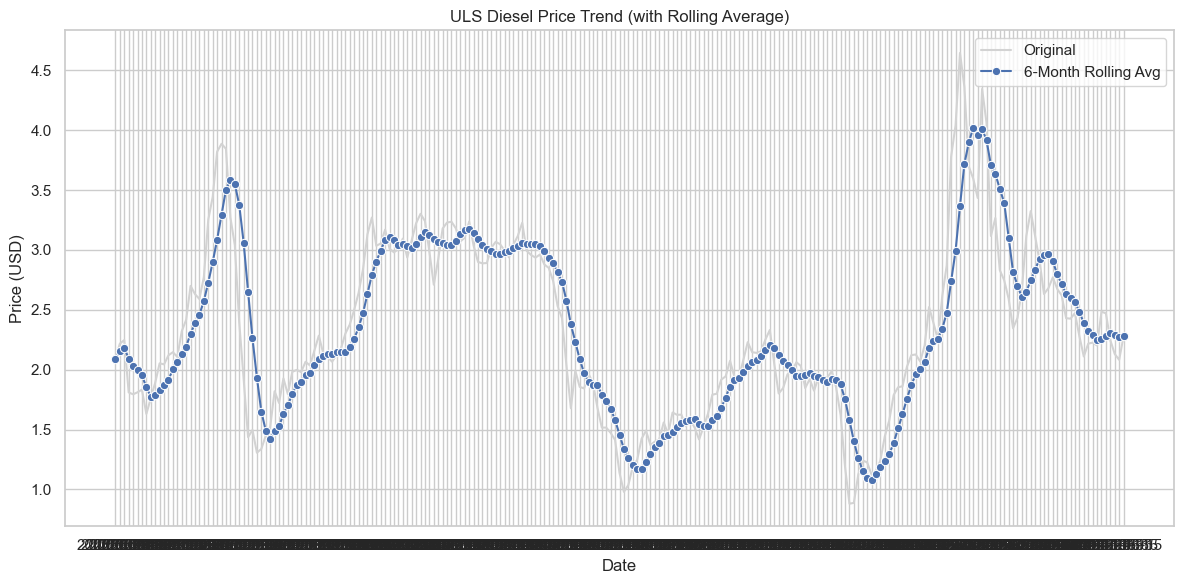

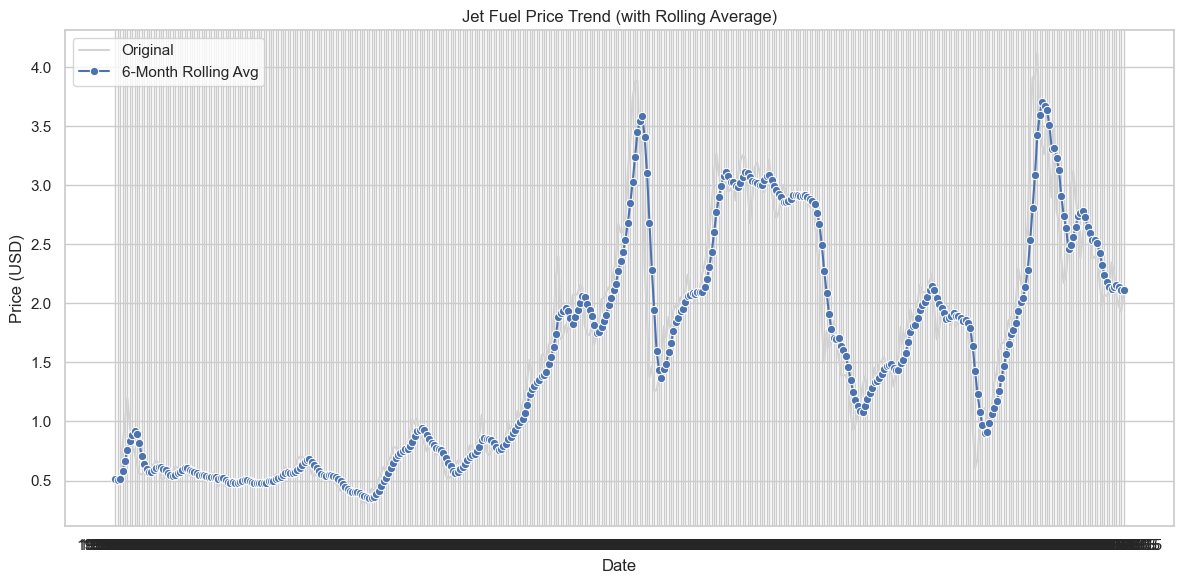

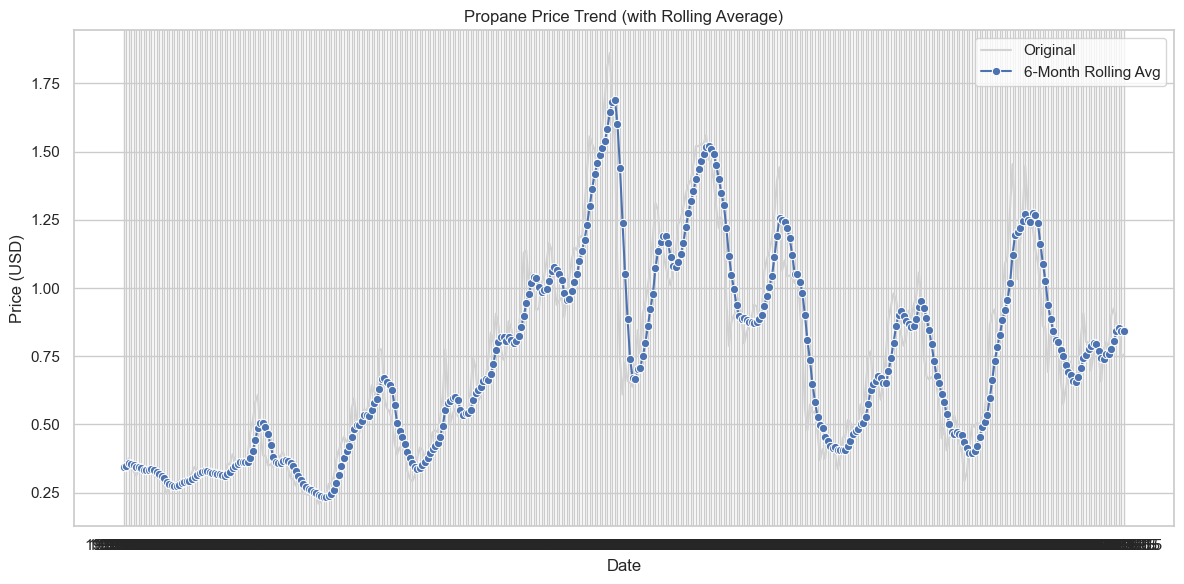

In [5]:
#rolling price
df['Rolling Price'] = df.groupby('Fuel Type')['Price'].transform(lambda x: x.rolling(6, min_periods=1).mean())

for fuel in fuel_types:
    plt.figure(figsize=(12, 6))
    fuel_df = df[df['Fuel Type'] == fuel]

    # Original price 
    sns.lineplot(data=fuel_df, x='Date', y='Price', label='Original', color='lightgray')

    # Rolling average
    sns.lineplot(data=fuel_df, x='Date', y='Rolling Price', label='6-Month Rolling Avg', marker='o')

    plt.title(f'{fuel} Price Trend (with Rolling Average)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [16]:
df = pd.read_csv('../data/cleaned/all_fuel_prices.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print(df.dtypes)
print(df.isnull().sum())
print(df['Fuel Type'].unique())
df[df['Fuel Type'] == 'Jet Fuel'].head()

Date         datetime64[ns]
Price               float64
Fuel Type            object
dtype: object
Date         0
Price        0
Fuel Type    0
dtype: int64
['Crude Oil' 'Conventional Gasoline' 'RBOB Regular Gasoline'
 'No. 2 Heating Oil' 'ULS Diesel' 'Jet Fuel' 'Propane']


,Date,Price,Fuel Type
1902,1990-05-15,0.515,Jet Fuel
1903,1990-06-15,0.494,Jet Fuel
1904,1990-07-15,0.535,Jet Fuel
1905,1990-08-15,0.791,Jet Fuel
1906,1990-09-15,1.012,Jet Fuel


In [ ]:
pivot_df = df.pivot(index='Date', columns='Fuel Type', values='Price').sort_index()
pivot_df.head()
pivot_df.columns
#the nan in the pivot table is because not all fuel prices were being recorded until later on
pivot_df.isnull().sum()

Fuel Type
Conventional Gasoline      5
Crude Oil                  0
Jet Fuel                  51
No. 2 Heating Oil          5
Propane                   77
RBOB Regular Gasoline    209
ULS Diesel               244
dtype: int64

In [19]:
correlation_matrix = pivot_df.corr()
correlation_with_crude = correlation_matrix['Crude Oil'].sort_values(ascending=False)
print("Correlation with Crude Oil:\n")
print(correlation_with_crude)

Correlation with Crude Oil:

Fuel Type
Crude Oil                1.000000
Conventional Gasoline    0.981660
Jet Fuel                 0.981416
No. 2 Heating Oil        0.977344
ULS Diesel               0.919661
RBOB Regular Gasoline    0.908975
Propane                  0.887740
Name: Crude Oil, dtype: float64


In [20]:
#check to see how long the correlation change lags behind
def lagged_correlation(refined_series, crude_series, max_lag=12):
    result={}
    for lag in range(0, max_lag + 1):
        shifted_crude= crude_series.shift(lag)   #simulate delay
        corr = refined_series.corr(shifted_crude)
        result[lag] = corr
    return result


In [ ]:
crude = pivot_df['Crude Oil']

for fuel in pivot_df:
    if fuel == 'Crude Oil':
        continue
    print(f'\n Lagged Correlation: Crude Oil to {fuel}')
    lagged_corrs = lagged_correlation(pivot_df[fuel], crude)
    for lag, corr in lagged_corrs.items():
        print(f' Lag {lag} months: r = {corr:.4f}') # 'r' for Pearson correlation coefficient


 Lagged Correlation: Crude Oil to Conventional Gasoline
 Lag 0 months: r = 0.9817
 Lag 1 months: r = 0.9699
 Lag 2 months: r = 0.9508
 Lag 3 months: r = 0.9299
 Lag 4 months: r = 0.9099
 Lag 5 months: r = 0.8928
 Lag 6 months: r = 0.8780
 Lag 7 months: r = 0.8674
 Lag 8 months: r = 0.8568
 Lag 9 months: r = 0.8478
 Lag 10 months: r = 0.8396
 Lag 11 months: r = 0.8301
 Lag 12 months: r = 0.8196

 Lagged Correlation: Crude Oil to Jet Fuel
 Lag 0 months: r = 0.9814
 Lag 1 months: r = 0.9737
 Lag 2 months: r = 0.9579
 Lag 3 months: r = 0.9384
 Lag 4 months: r = 0.9187
 Lag 5 months: r = 0.8998
 Lag 6 months: r = 0.8812
 Lag 7 months: r = 0.8648
 Lag 8 months: r = 0.8469
 Lag 9 months: r = 0.8312
 Lag 10 months: r = 0.8172
 Lag 11 months: r = 0.8025
 Lag 12 months: r = 0.7882

 Lagged Correlation: Crude Oil to No. 2 Heating Oil
 Lag 0 months: r = 0.9773
 Lag 1 months: r = 0.9702
 Lag 2 months: r = 0.9571
 Lag 3 months: r = 0.9410
 Lag 4 months: r = 0.9253
 Lag 5 months: r = 0.9094
 Lag 6 m

In [ ]:
from scipy.stats import pearsonr

In [23]:
def lagged_correlation_with_p(refined_series, crude_series, max_lag=12):
    result = {}
    for lag in range(0, max_lag + 1):
        shifted_crude = crude_series.shift(lag)

        #drop NaNs from both series for fair comparison
        valid_data = refined_series.notna() & shifted_crude.notna()
        r, p = pearsonr(refined_series[valid_data], shifted_crude[valid_data])
        result[lag] = (r, p)
    return result

In [26]:
crude = pivot_df['Crude Oil']

for fuel in pivot_df.columns:
    if fuel == 'Crude Oil':
        continue
    
    print(f'\n Crude Oil -> {fuel}')
    lagged_results = lagged_correlation_with_p(pivot_df[fuel], crude)
    
    for lag, (r, p) in lagged_results.items():
        sig = "Signicant" if p < 0.05 else 'Unsignificant'
        print((f' Lag{lag} months : r = {r:.4f}, p = {p:.4f} {sig} '))




 Crude Oil -> Conventional Gasoline
 Lag0 months : r = 0.9817, p = 0.0000 Signicant 
 Lag1 months : r = 0.9699, p = 0.0000 Signicant 
 Lag2 months : r = 0.9508, p = 0.0000 Signicant 
 Lag3 months : r = 0.9299, p = 0.0000 Signicant 
 Lag4 months : r = 0.9099, p = 0.0000 Signicant 
 Lag5 months : r = 0.8928, p = 0.0000 Signicant 
 Lag6 months : r = 0.8780, p = 0.0000 Signicant 
 Lag7 months : r = 0.8674, p = 0.0000 Signicant 
 Lag8 months : r = 0.8568, p = 0.0000 Signicant 
 Lag9 months : r = 0.8478, p = 0.0000 Signicant 
 Lag10 months : r = 0.8396, p = 0.0000 Signicant 
 Lag11 months : r = 0.8301, p = 0.0000 Signicant 
 Lag12 months : r = 0.8196, p = 0.0000 Signicant 

 Crude Oil -> Jet Fuel
 Lag0 months : r = 0.9814, p = 0.0000 Signicant 
 Lag1 months : r = 0.9737, p = 0.0000 Signicant 
 Lag2 months : r = 0.9579, p = 0.0000 Signicant 
 Lag3 months : r = 0.9384, p = 0.0000 Signicant 
 Lag4 months : r = 0.9187, p = 0.0000 Signicant 
 Lag5 months : r = 0.8998, p = 0.0000 Signicant 
 Lag6